In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from pickle import load
from sklearn.preprocessing import StandardScaler

# Predictive Icorr

In [10]:
# 读取模型
loaded_model = load(open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/BOXGBT_6.pkl', 'rb'))

In [11]:
# Read data
dataset = pd.read_csv('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/Corrosion_current_density.csv')
dataset = dataset[dataset['icorr'] <= 8.1]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 318
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   304 non-null    int64  
 1   Composition  304 non-null    object 
 2   Environment  304 non-null    int64  
 3   PH           304 non-null    float64
 4   [Cl-]        304 non-null    float64
 5   [SO42-]      304 non-null    float64
 6   VEC          304 non-null    float64
 7   σVEC         304 non-null    float64
 8   ΔSmix        304 non-null    float64
 9   ΔHmix        304 non-null    float64
 10  Ω            304 non-null    float64
 11  δ            304 non-null    float64
 12  rbar         304 non-null    float64
 13  Δχ           304 non-null    float64
 14  χbar         304 non-null    float64
 15  e/a          304 non-null    float64
 16  Tm           304 non-null    float64
 17  σT           304 non-null    float64
 18  Ec           304 non-null    float64
 19  Al           

In [12]:
# Remove unnecessary axes
dataset = dataset.drop('Composition', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset = dataset.drop('rbar', axis=1)
dataset = dataset.drop('χbar', axis=1)
dataset = dataset.drop('σT', axis=1)
dataset = dataset.drop('Ec', axis=1)
dataset = dataset.drop('Hf', axis=1)
dataset = dataset.drop('Ta', axis=1)
dataset = dataset.drop('P', axis=1)
dataset = dataset.drop('Zr', axis=1)
dataset = dataset.drop('B', axis=1)
dataset = dataset.drop('C', axis=1)
dataset = dataset.drop('Mo', axis=1)
dataset = dataset.drop('Y', axis=1)
dataset = dataset.drop('W', axis=1)
dataset = dataset.drop('V', axis=1)
dataset = dataset.drop('Si', axis=1)
dataset = dataset.drop('Sn', axis=1)
dataset = dataset.drop('[SO42-]', axis=1)
dataset = dataset.drop('Al', axis=1)
dataset = dataset.drop('VEC', axis=1)
dataset = dataset.drop('σVEC', axis=1)
dataset = dataset.drop('ΔSmix', axis=1)
dataset = dataset.drop('Ω', axis=1)
dataset = dataset.drop('Co', axis=1)
dataset = dataset.drop('Ti', axis=1)
dataset = dataset.drop('Mn', axis=1)
dataset = dataset.drop('Nb', axis=1)

dataset.isna().sum()

Environment    0
PH             0
[Cl-]          0
ΔHmix          0
δ              0
Δχ             0
e/a            0
Tm             0
Cr             0
Fe             0
Ni             0
Cu             0
icorr          0
dtype: int64

In [13]:
# Remove blank lines
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  304 non-null    int64  
 1   PH           304 non-null    float64
 2   [Cl-]        304 non-null    float64
 3   ΔHmix        304 non-null    float64
 4   δ            304 non-null    float64
 5   Δχ           304 non-null    float64
 6   e/a          304 non-null    float64
 7   Tm           304 non-null    float64
 8   Cr           304 non-null    float64
 9   Fe           304 non-null    float64
 10  Ni           304 non-null    float64
 11  Cu           304 non-null    float64
 12  icorr        304 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 33.2 KB


In [14]:
from sklearn.model_selection import train_test_split


# Divide data into X and y axes
y = dataset['icorr']
X = dataset.drop(['icorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150
                                                    )

# Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Save data standardization tool
# dump(sc, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/.pkl', 'wb'))

# Feature importance

        feature  importance
1            PH    0.341683
0   Environment    0.291925
11           Cu    0.107872
8            Cr    0.041461
5            Δχ    0.034337
10           Ni    0.030622
9            Fe    0.028277
4             δ    0.026871
2         [Cl-]    0.025192
3         ΔHmix    0.024927
7            Tm    0.024797
6           e/a    0.022036


<Figure size 800x600 with 0 Axes>

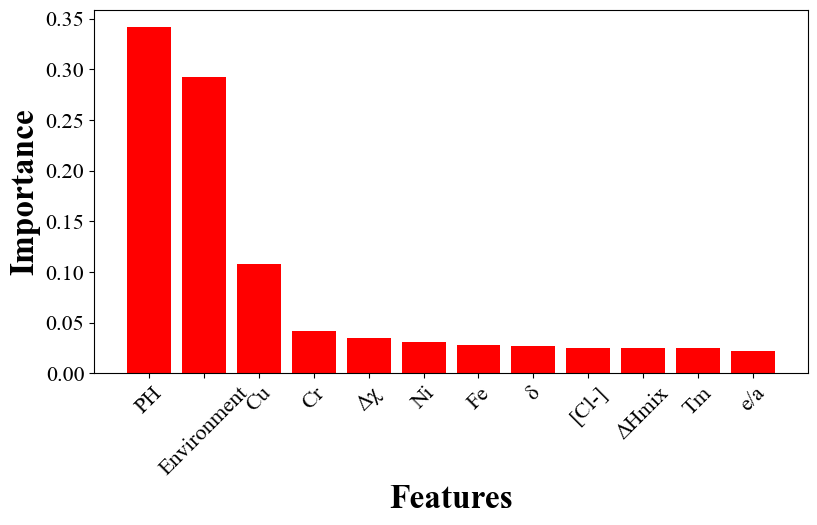

In [15]:
# Set image size, font size, font type
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# Get the name of the input feature
feature_names = dataset.columns[:-1]

# Output each feature name and corresponding importance value
importances = loaded_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# Draw a bar chart
plt.figure(figsize=(8, 5))
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.xlabel('Features',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.ylabel('Importance',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.xticks(fontproperties={'family':'Times New Roman', 'size':16})
plt.yticks(fontproperties={'family':'Times New Roman', 'size':16})
plt.show()

# SHAP

In [16]:
!pip install shap

   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 14.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ----- ---------------------------------- 4.2/30.3 MB 20.9 MB/s eta 0:00:02
   ----------- ---------------------------- 8.7/30.3 MB 20.6 MB/s eta 0:00:02
   ----------------- ---------------------- 13.1/30.3 MB 20.6 MB/s eta 0:00:01
   ---------------------- ----------------- 17.3/30.3 MB 20.6 MB/s eta 0:00:01
   ---------------------------- ----------- 21.8/30.3 MB 20.5 MB/s eta 0:00:01
   ---------------------------------- ----- 26.2/30.3 MB 20.8 MB/s eta 0:00:01
   -------------------------------------- - 28.8/30.3 MB 19.2 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 18.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# Create a SHAP interpreter
explainer1 = shap.Explainer(loaded_model, X_train)

# Calculate SHAP value
shap_values = explainer1(X_test)

# Analyzing the importance of overall characteristics
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
plt.xlabel('SHAP value', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.ylabel('Features', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.xticks(fontsize=16)               
plt.yticks(fontsize=16)

plt.show()

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 6.124735, while the model output was 5.752955. If this difference is acceptable you can set check_additivity=False to disable this check.

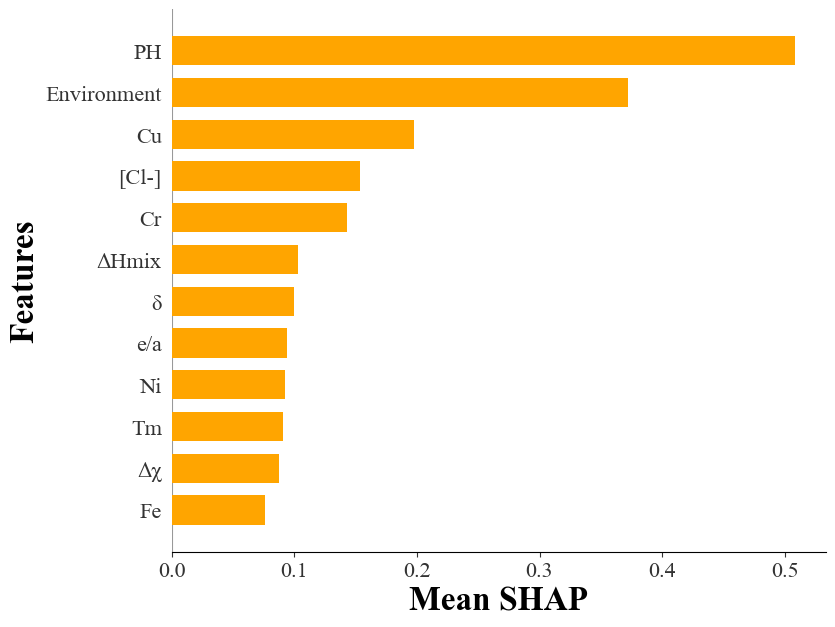

In [18]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type='bar', color='orange', show=False)
plt.xlabel('Mean SHAP', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.ylabel('Features', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.xticks(fontproperties={'family':'Times New Roman', 'size':16})
plt.yticks(fontproperties={'family':'Times New Roman', 'size':16})
plt.show()

# predict Ecorr

In [20]:
# Read the model
loaded_model = load(open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/BOGBDT_6.pkl', 'rb'))

In [22]:
# Read data
dataset = pd.read_csv('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/Corrosion_potential.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   319 non-null    int64  
 1   Composition  319 non-null    object 
 2   Environment  319 non-null    int64  
 3   PH           319 non-null    float64
 4   [Cl-]        319 non-null    float64
 5   [SO42-]      319 non-null    float64
 6   VEC          319 non-null    float64
 7   σVEC         319 non-null    float64
 8   ΔSmix        319 non-null    float64
 9   ΔHmix        319 non-null    float64
 10  Ω            319 non-null    float64
 11  δ            319 non-null    float64
 12  rbar         319 non-null    float64
 13  Δχ           319 non-null    float64
 14  χbar         319 non-null    float64
 15  e/a          319 non-null    float64
 16  Tm           319 non-null    float64
 17  σT           319 non-null    float64
 18  Ec           319 non-null    float64
 19  Al      

In [23]:
# Remove unnecessary axes
dataset = dataset.drop('Composition', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset = dataset.drop('VEC', axis=1)
dataset = dataset.drop('σT', axis=1)
dataset = dataset.drop('Ec', axis=1)
dataset = dataset.drop('Hf', axis=1)
dataset = dataset.drop('Ta', axis=1)
dataset = dataset.drop('P', axis=1)
dataset = dataset.drop('Zr', axis=1)
dataset = dataset.drop('B', axis=1)
dataset = dataset.drop('C', axis=1)
dataset = dataset.drop('W', axis=1)
dataset = dataset.drop('V', axis=1)
dataset = dataset.drop('Si', axis=1)
dataset = dataset.drop('Sn', axis=1)
dataset = dataset.drop('Ti', axis=1)
dataset = dataset.drop('Al', axis=1)
dataset = dataset.drop('[SO42-]', axis=1)
dataset = dataset.drop('ΔSmix', axis=1)
dataset = dataset.drop('Ω', axis=1)
dataset = dataset.drop('δ', axis=1)
dataset = dataset.drop('rbar', axis=1)
dataset = dataset.drop('Δχ', axis=1)
dataset = dataset.drop('Fe', axis=1)
dataset = dataset.drop('Ni', axis=1)
dataset = dataset.drop('Cu', axis=1)
dataset = dataset.drop('Mn', axis=1)
dataset = dataset.drop('Mo', axis=1)
dataset = dataset.drop('Nb', axis=1)

dataset.isna().sum()

Environment    0
PH             0
[Cl-]          0
σVEC           0
ΔHmix          0
χbar           0
e/a            0
Tm             0
Co             0
Cr             0
Y              0
Ecorr          4
dtype: int64

In [24]:
# Remove blank lines
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 0 to 318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  315 non-null    int64  
 1   PH           315 non-null    float64
 2   [Cl-]        315 non-null    float64
 3   σVEC         315 non-null    float64
 4   ΔHmix        315 non-null    float64
 5   χbar         315 non-null    float64
 6   e/a          315 non-null    float64
 7   Tm           315 non-null    float64
 8   Co           315 non-null    float64
 9   Cr           315 non-null    float64
 10  Y            315 non-null    float64
 11  Ecorr        315 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 32.0 KB


In [25]:
from sklearn.model_selection import train_test_split


# Divide data into X and y axes
y = dataset['Ecorr']
X = dataset.drop(['Ecorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150
                                                    )

# Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Save data standardization tool
# dump(sc, open('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/.pkl', 'wb'))

# Feature importance

       feature  importance
1    Feature 1    0.298202
0    Feature 0    0.164775
8    Feature 8    0.080814
11  Feature 11    0.073602
4    Feature 4    0.058563
10  Feature 10    0.057216
5    Feature 5    0.052830
3    Feature 3    0.051772
6    Feature 6    0.047202
7    Feature 7    0.045901
9    Feature 9    0.038379
2    Feature 2    0.030744


<Figure size 800x600 with 0 Axes>

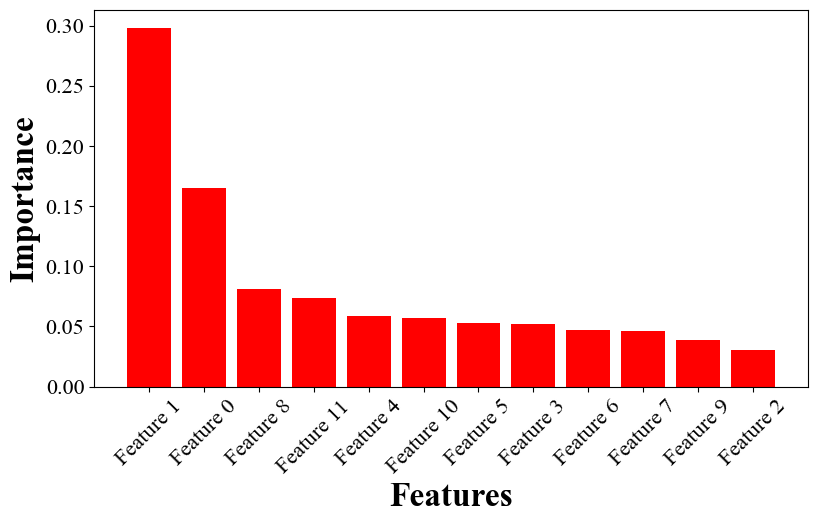

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Divide data into X and y axes
y = dataset['Ecorr']
X = dataset.drop(['Ecorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=150)

# Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Set image size, font size, font type
plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# ✅ Use correct feature names
feature_names = X.columns

# Output each feature name and corresponding importance value
importances = loaded_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Generic feature names in case real ones aren't available
feature_names = [f'Feature {i}' for i in range(len(importances))]

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})
print(feature_importances.sort_values('importance', ascending=False))

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(range(len(importances)), importances[indices], color="r", align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.xlabel('Features', fontproperties={'family': 'Times New Roman', 'weight': 'bold', 'size': 24})
plt.ylabel('Importance', fontproperties={'family': 'Times New Roman', 'weight': 'bold', 'size': 24})
plt.xticks(fontproperties={'family': 'Times New Roman', 'size': 16})
plt.yticks(fontproperties={'family': 'Times New Roman', 'size': 16})
plt.show()



# SHAP

In [33]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# Create a SHAP interpreter
explainer = shap.Explainer(loaded_model, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

# Analyzing the importance of overall characteristics
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
plt.xlabel('SHAP value', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.ylabel('Features', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.xticks(fontsize=16)               
plt.yticks(fontsize=16)

plt.show()


ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 6.124561, while the model output was 5.752955. If this difference is acceptable you can set check_additivity=False to disable this check.

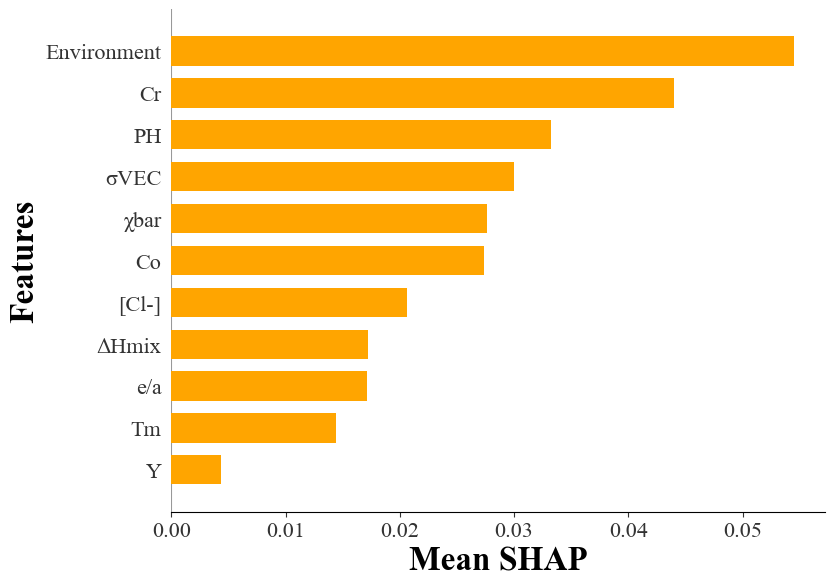

In [18]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type='bar', color='orange', show=False)
plt.xlabel('Mean SHAP', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.ylabel('Features', fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.xticks(fontproperties={'family':'Times New Roman', 'size':16})
plt.yticks(fontproperties={'family':'Times New Roman', 'size':16})
plt.show()